In [3]:
!pip install yfinance==0.2.4

In [2]:
import yfinance as yf
import pandas as pd

In [14]:
tesla = yf.Ticker("TSLA" )

In [15]:
tesla_data = tesla.history (period="max")

In [16]:
tesla_data.reset_index(inplace=True)
tesla_data. head ()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [17]:
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/noarch         [<=>                 ] (00m:00s) 
pkgs/main/noarch       

In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [33]:
import pandas as pd

import yfinance as yf
import requests
from bs4 import BeautifulSoup

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [46]:
def plot_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price ($)", "Historical Revenue ($)"), vertical_spacing = .5)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=1000, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

In [34]:
url='https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

html_text = requests.get(url).text

soup=BeautifulSoup(html_text, 'html5lib')

In [35]:
tsla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all('table')
table_index=0

for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # to remove comma and dollar sign
        revenue =col[1].text.replace("$", "").replace(",", "")
        tsla_revenue=tsla_revenue.append({'Date':date,'Revenue':revenue},
                                           ignore_index=True)

# displaying dataframe
tsla_revenue

,Date,Revenue
0,2022-12-31,24318
1,2022-09-30,21454
2,2022-06-30,16934
3,2022-03-31,18756
4,2021-12-31,17719
5,2021-09-30,13757
6,2021-06-30,11958
7,2021-03-31,10389
8,2020-12-31,10744
9,2020-09-30,8771


In [36]:
tsla_revenue = tsla_revenue[tsla_revenue['Revenue']!='']
tsla_revenue

,Date,Revenue
0,2022-12-31,24318
1,2022-09-30,21454
2,2022-06-30,16934
3,2022-03-31,18756
4,2021-12-31,17719
5,2021-09-30,13757
6,2021-06-30,11958
7,2021-03-31,10389
8,2020-12-31,10744
9,2020-09-30,8771


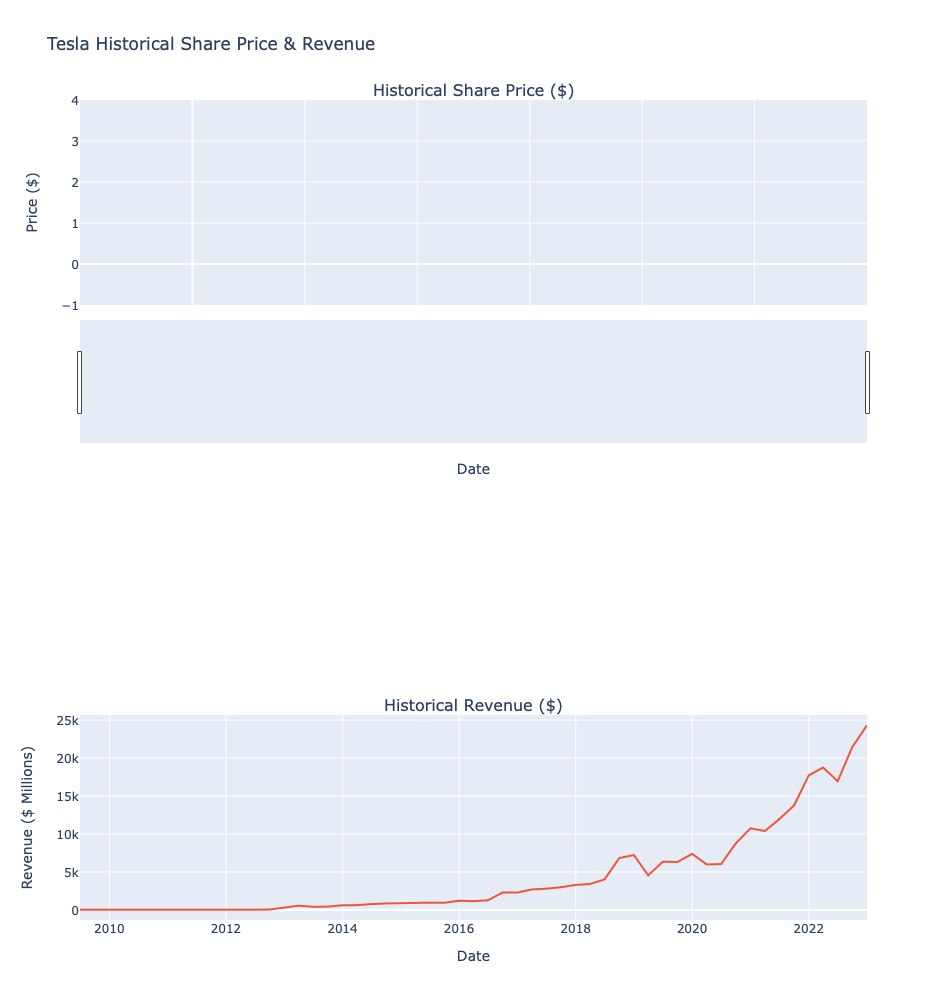

In [47]:
plot_graph(tesla_data, tsla_revenue, 'Tesla Historical Share Price & Revenue')

In [12]:
gamestop_data = gamestop.history (period="max")

In [11]:
gamestop = yf.Ticker("GME" )

In [13]:
gamestop_data.reset_index(inplace=True)
gamestop_data. head ()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [37]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Save the text of the response
html_data = requests.get(url).text

# parse the html data
soup=BeautifulSoup(html_data, 'html5lib')

In [38]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all('table')

table_index=0
for index, table in enumerate(tables):
    if ('GameStop Quarterly Revenue'in str(table)):
        table_index=index
        
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col!=[]):
        date =col[0].text
        # comma and dollar sign is removed
        revenue =col[1].text.replace("$", "").replace(",", "")
        gme_revenue=gme_revenue.append({'Date':date,'Revenue':revenue},
                                       ignore_index=True)
        
gme_revenue.head()

,Date,Revenue
0,2023-01-31,2226
1,2022-10-31,1186
2,2022-07-31,1136
3,2022-04-30,1378
4,2022-01-31,2254


In [48]:
def plot_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price ($)", "Historical Revenue ($)"), vertical_spacing = .5)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=1000, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

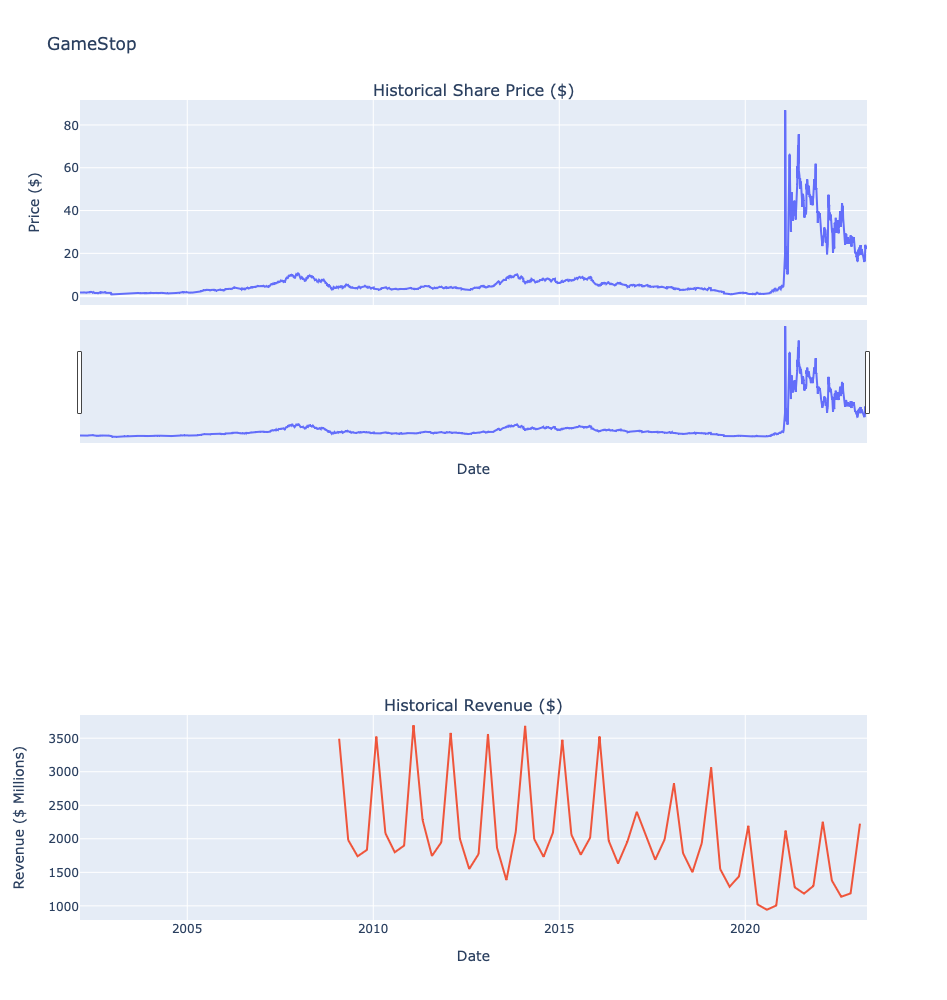

In [50]:
plot_graph(gamestop_data, gme_revenue, 'GameStop')